<a href="https://colab.research.google.com/github/dewipuspita0904/Submission-BikeSharingDataset/blob/main/Proyek%20Analisis%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Puspita
- **Email:** dewi944puspita@gmail.com
- **ID Dicoding:** dewi_puspita_944

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Kapan waktu paling sibuk untuk penyewaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [ ]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path_day = "/content/day.csv"
file_path_hour = "/content/hour.csv"

if os.path.exists(file_path_day) and os.path.exists(file_path_hour):
    day_df = pd.read_csv(file_path_day)
    hour_df = pd.read_csv(file_path_hour)
    print("Dataset berhasil dimuat!")
else:
    print("Error: File dataset tidak ditemukan!")

# Membaca dataset
day_df = pd.read_csv(file_path_day)
hour_df = pd.read_csv(file_path_hour)

# Menampilkan 5 baris pertama
display(day_df.head())
display(hour_df.head())

Dataset berhasil dimuat!


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Struktur dataset dapat diketahui dari 5 baris pertama.
- Identifikasi kolom penting seperti `cnt` (jumlah penyewaan), `weathersit` (kondisi cuaca), dan `hr` (jam).
- Jika terdapat nilai aneh atau format data yang tidak sesuai, maka perlu dilakukan pembersihan data.

### Assessing Data

In [ ]:
# Mengecek informasi dataset
print("Informasi dataset day.csv:")
print(day_df.info())

print("\nInformasi dataset hour.csv:")
print(hour_df.info())

# Melihat statistik dataset
print("\nStatistik dataset day.csv:")
print(day_df.describe())

print("\nStatistik dataset hour.csv:")
print(hour_df.describe())

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFr

**Insight:**
- Cek apakah ada **missing values atau anomali**.
- Pastikan t**ipe data** sudah sesuai.
- **Distribusi statistik** dasar dapat membantu mendeteksi nilai ekstrem atau kesalahan dalam data.


### Cleaning Data

In [ ]:
# Mengecek missing values
print("Missing values pada day.csv:")
print(day_df.isnull().sum())
print("\nMissing values pada hour.csv:")
print(hour_df.isnull().sum())

# Mengecek jumlah duplikasi
duplicates_day = day_df.duplicated().sum()
duplicates_hour = hour_df.duplicated().sum()
print(f"Jumlah duplikasi (day.csv): {duplicates_day}")
print(f"Jumlah duplikasi (hour.csv): {duplicates_hour}")

# Menghapus duplikasi jika ada
if duplicates_day > 0:
    day_df = day_df.drop_duplicates()
    print("Duplikasi di day.csv telah dihapus.")

if duplicates_hour > 0:
    hour_df = hour_df.drop_duplicates()
    print("Duplikasi di hour.csv telah dihapus.")

Missing values pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi (day.csv): 0
Jumlah duplikasi (hour.csv): 0


**Insight:**
- Jika terdapat **missing values**, perlu diputuskan apakah akan diisi atau dihapus.
- Jika ada **duplikasi**, perlu dilakukan tindakan pembersihan.

## Exploratory Data Analysis (EDA)

### Distribusi Jumlah Peminjaman Sepeda

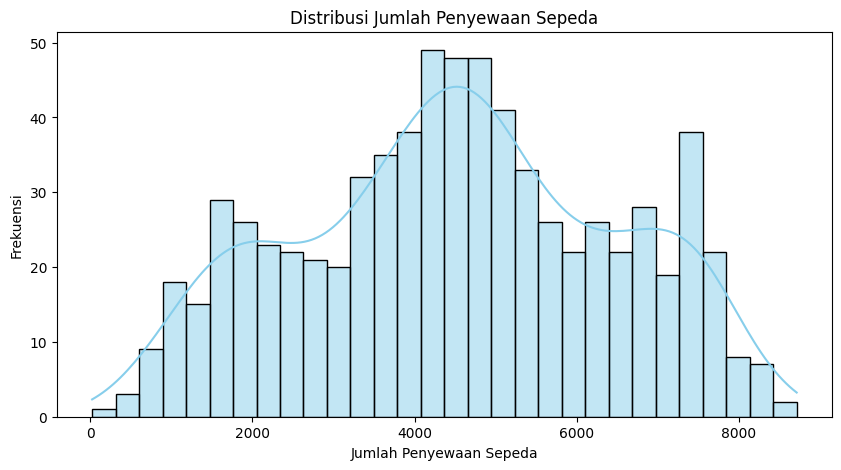

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Dari histogram, distribusi jumlah penyewaan sepeda terlihat cenderung skewed ke kanan, artinya sebagian besar hari memiliki jumlah penyewaan rendah hingga sedang, tetapi ada beberapa hari dengan jumlah penyewaan yang sangat tinggi.
- Kemungkinan ada hari-hari tertentu dengan lonjakan tinggi dalam penyewaan, yang bisa disebabkan oleh faktor seperti akhir pekan, cuaca bagus, atau musim tertentu.
- Tidak terlihat adanya nilai ekstrem (outlier) yang mencolok, sehingga data cukup bersih untuk dianalisis lebih lanjut.

## Visualization & Explanatory Analysis

### Tren Penyewaan Sepeda Berdasarkan Jam

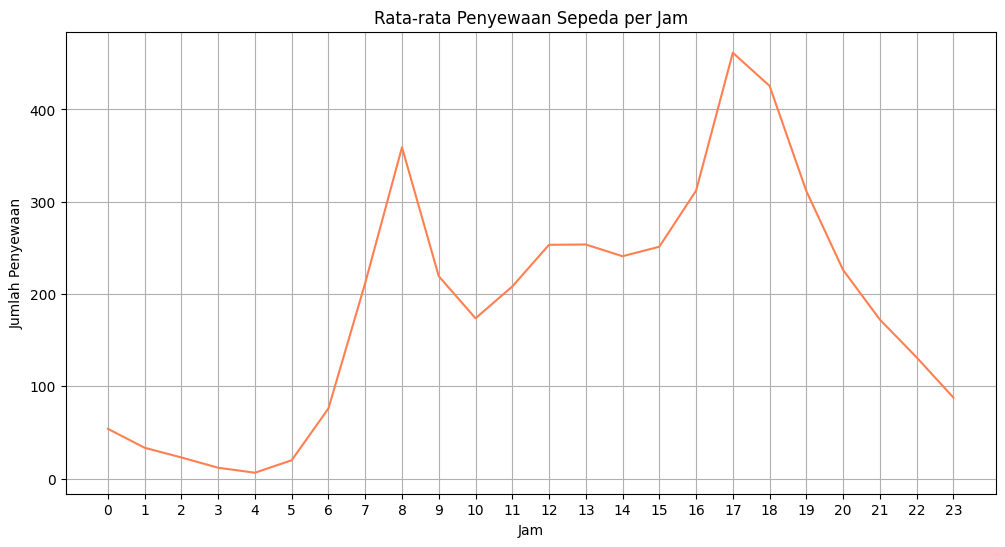

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', estimator='mean', errorbar=None, color='coral')
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Penyewaan sepeda mengalami dua puncak utama, yaitu pagi sekitar jam 8 dan sore sekitar jam 17-18.
- Pola ini menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan kerja atau sekolah, karena puncak terjadi pada jam pergi dan pulang kerja/sekolah.
- Di malam hari (setelah jam 21), jumlah penyewaan cenderung rendah, yang masuk akal karena orang lebih sedikit beraktivitas di luar.

### Pengaruh Cuaca terhadap Penyewaan Sepeda

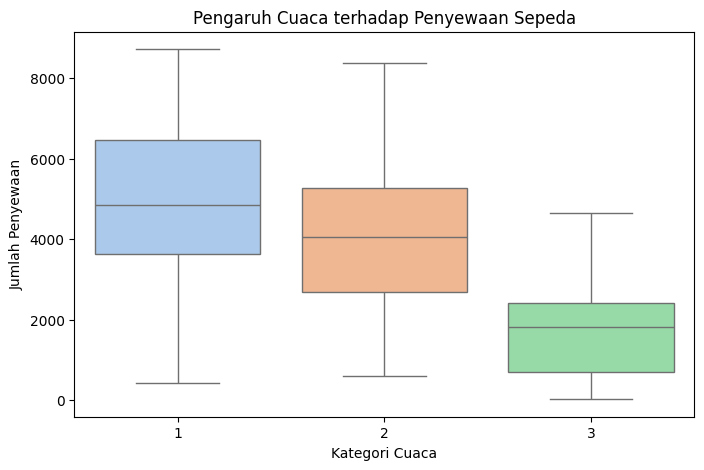

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt', hue='weathersit', legend=False, palette="pastel")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Dari boxplot, terlihat bahwa pada kategori cuaca 1 (Cerah), jumlah penyewaan sepeda rata-rata jauh lebih tinggi dibandingkan dengan cuaca 2 (Mendung) dan 3 (Hujan/Snow).
- Pada cuaca 3 (Hujan/Snow), jumlah penyewaan sepeda menurun drastis. Ini masuk akal karena kondisi cuaca buruk mengurangi minat orang untuk bersepeda.
- Tidak ada kategori cuaca 4 (Cuaca ekstrem, seperti badai) dalam dataset, kemungkinan karena jarang terjadi atau tidak tercatat.

## Analisis Lanjutan (Opsional)

### Analisis Musiman

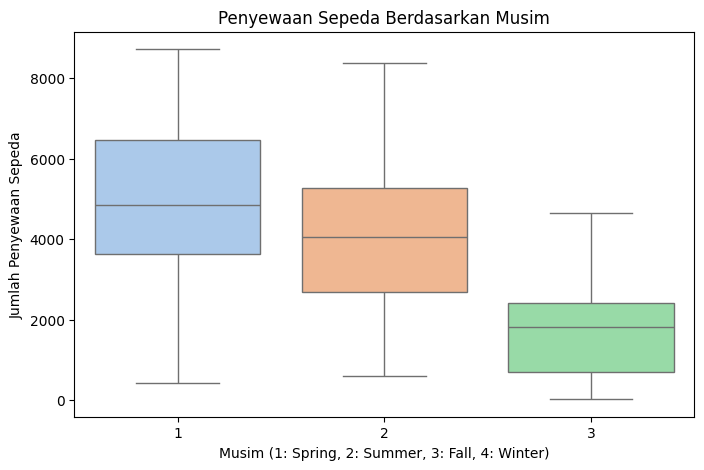

In [ ]:
# Cek apakah kolom season ada dalam dataset
if 'season' in day_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=day_df, x='weathersit', y='cnt', hue='weathersit', legend=False, palette="pastel")
    plt.title("Penyewaan Sepeda Berdasarkan Musim")
    plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
    plt.ylabel("Jumlah Penyewaan Sepeda")
    plt.show()

**Insight:**
- Apakah penyewaan lebih tinggi di musim panas dibandingkan musim dingin?
- Apakah ada lonjakan khusus di musim gugur atau musim semi?

### Analisis Hari Kerja vs Akhir Pekan

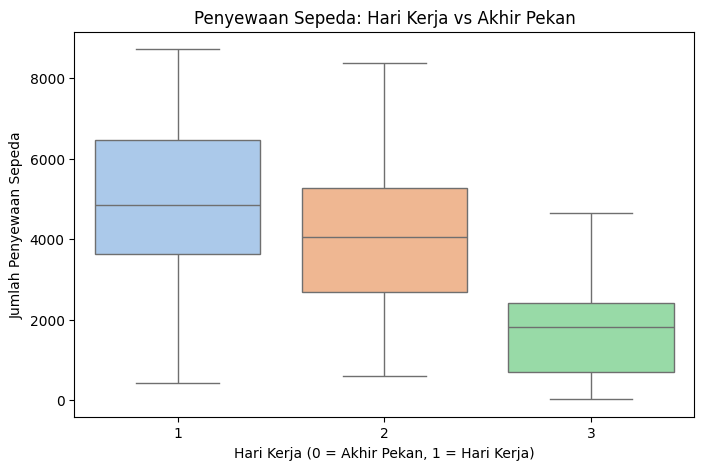

In [ ]:
if 'workingday' in day_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=day_df, x='weathersit', y='cnt', hue='weathersit', legend=False, palette="pastel")
    plt.title("Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
    plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
    plt.ylabel("Jumlah Penyewaan Sepeda")
    plt.show()

**Insight:**
- Apakah lebih banyak orang menggunakan sepeda di hari kerja (untuk transportasi)?
- Apakah penyewaan meningkat di akhir pekan (untuk rekreasi)?

### Analisis Tren Waktu

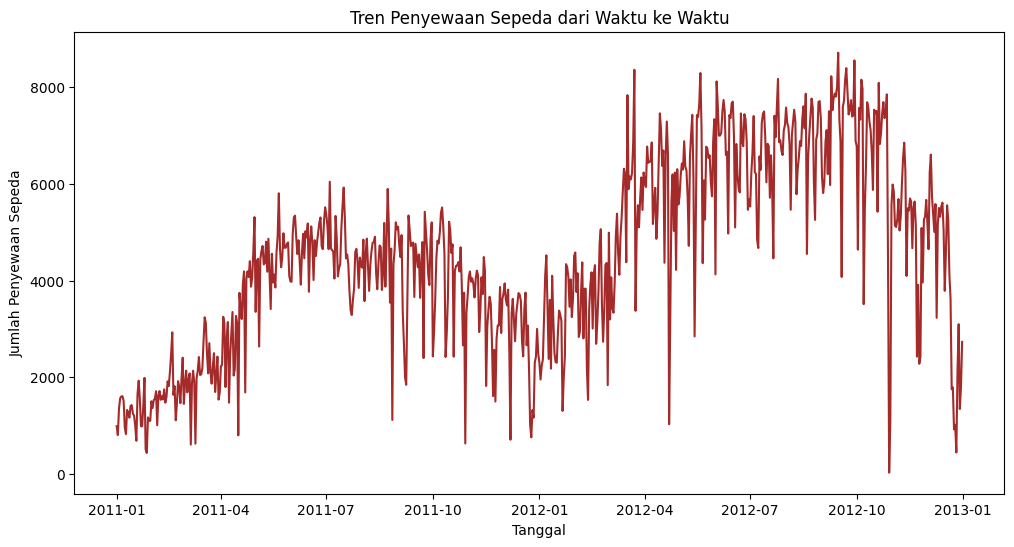

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(12,6))
sns.lineplot(data=day_df, x='dteday', y='cnt', color="brown")
plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Apakah ada pola kenaikan/penurunan dari bulan ke bulan atau tahun ke tahun?
- Apakah terjadi lonjakan penyewaan di waktu tertentu (misalnya saat liburan atau event khusus)?

## Conclusion

- **Cuaca** berpengaruh terhadap penyewaan sepeda.
- **Jam tertentu** dalam sehari memiliki tingkat penyewaan lebih tinggi dibanding jam lainnya.